In [8]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## <font color='red'>Reading and preparing data </font>

In [9]:
df = pd.read_csv("data.csv")
len(df)

11914

In [10]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [22]:
# replace all spaces with underscores and lowercase all letters

df.columns = df.columns.str.lower().str.replace(" ","_")
string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
    df[col] = df[col].str.replace(" ", "_")
    
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [23]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1_Series_M,2011,premium_unleaded_(required),335.0,6.0,MANUAL,rear_wheel_drive,2.0,"Factory_Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1_Series,2011,premium_unleaded_(required),300.0,6.0,MANUAL,rear_wheel_drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1_Series,2011,premium_unleaded_(required),300.0,6.0,MANUAL,rear_wheel_drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1_Series,2011,premium_unleaded_(required),230.0,6.0,MANUAL,rear_wheel_drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1_Series,2011,premium_unleaded_(required),230.0,6.0,MANUAL,rear_wheel_drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium_unleaded_(required),300.0,6.0,AUTOMATIC,all_wheel_drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr_Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium_unleaded_(required),300.0,6.0,AUTOMATIC,all_wheel_drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr_Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium_unleaded_(required),300.0,6.0,AUTOMATIC,all_wheel_drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr_Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium_unleaded_(recommended),300.0,6.0,AUTOMATIC,all_wheel_drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr_Hatchback,23,16,204,50920


/home/abdelhakim54/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrp'>

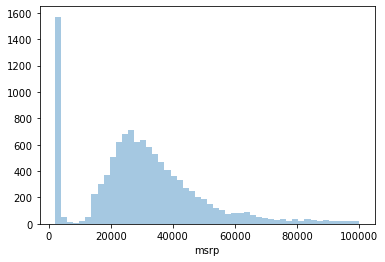

In [29]:
sns.distplot(df.msrp[df.msrp < 100000], kde=False)

In [ ]:
# we notice a long tail

In [25]:
log_price = np.log1p(df.msrp)

/home/abdelhakim54/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrp'>

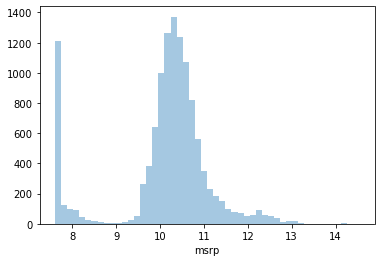

In [32]:
sns.distplot(log_price, kde=False)

## <font color='red'>Checking for missing values</font>

In [35]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We will need to deal with missing values later, when we train the model, so we should
keep this problem in mind. For now, we won’t do anything else with these features and will
proceed to the next step: setting up the validation framework so that we can train and test
machine learning models.